# DID시계열 셋팅
## 기간: 2019-01-17 ~ 2021-01-20 (전후 3일 추가)

In [1]:
#필요라이브러리 다운로드 
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform 

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#그래프에서 마이너스 표시되게
matplotlib.rcParams['axes.unicode_minus']=False

In [78]:
#원본 데이터 셋 로드
#2019-01-20~2021-01-20까지 존재
import pandas as pd
origin = pd.read_csv('theLog_210917.csv')
origin

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,4755,2011-12-22,라이엇게임즈,P,RTS,2019-01-17
1,737,배틀그라운드,2,0,19.64,61.31,1.23,1539932964,5037,305759,4692,2017-06-26,카카오/스팀,P,FPS,2019-01-17
2,750,피파온라인4,3,0,7.11,92.05,-0.40,557364347,2866,194528,4687,2017-12-14,넥슨,P,스포츠,2019-01-17
3,707,오버워치,4,0,7.04,21.96,-0.38,551336198,4299,128254,4650,2016-05-24,블리자드,P,FPS,2019-01-17
4,793,로스트아크,5,0,6.75,42.75,0.19,528826463,9041,58494,4501,2018-10-29,스마일게이트,P,RPG,2019-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215958,880,Magic: The Gathering Arena,293,-35,0.01,0.01,0.00,3489,1745,2,2,2019-10-15,위저드 오브 더 코스트,P,보드,2021-01-20
215959,142,큐온라인,294,-21,0.01,0.01,0.00,1876,1876,1,1,0000-00-00,(주)인사이트큐브,F,스포츠,2021-01-20
215960,139,위드,295,-19,0.01,0.01,0.00,1722,1722,1,1,0000-00-00,조이임팩트,P,RPG,2021-01-20
215961,232,S4리그,296,0,0.01,0.01,0.01,314,314,1,1,0000-00-00,네오위즈,F,FPS,2021-01-20


In [79]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215963 entries, 0 to 215962
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gameCode        215963 non-null  int64  
 1   gameName        215963 non-null  object 
 2   gameRank        215963 non-null  int64  
 3   gameRankUpDown  215963 non-null  int64  
 4   gameShares      215963 non-null  float64
 5   gameTypeShares  215963 non-null  float64
 6   sharesUpDown    215963 non-null  float64
 7   timeCountTotal  215963 non-null  int64  
 8   avgUsedTime     215963 non-null  int64  
 9   userCountTotal  215963 non-null  int64  
 10  useStoreCount   215963 non-null  int64  
 11  gameRegDate     215963 non-null  object 
 12  publisher       215963 non-null  object 
 13  payType         215228 non-null  object 
 14  gameTypeName    215963 non-null  object 
 15  date            215963 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 26.4+ M

In [80]:
#paytpye 결측치 확인
origin[origin['payType'].isnull()]

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date
212,473,야채부락리,213,7,0.01,0.02,0.0,151384,2163,70,49,2010-11-24,넷마블,NaN,RPG,2019-01-17
488,473,야채부락리,198,15,0.01,0.02,0.0,200288,2473,81,58,2010-11-24,넷마블,NaN,RPG,2019-01-18
780,473,야채부락리,201,-3,0.01,0.02,0.0,275014,2865,96,67,2010-11-24,넷마블,NaN,RPG,2019-01-19
1073,473,야채부락리,200,1,0.01,0.02,0.0,259702,2474,105,68,2010-11-24,넷마블,NaN,RPG,2019-01-20
1359,473,야채부락리,195,5,0.01,0.02,0.0,198558,2920,68,42,2010-11-24,넷마블,NaN,RPG,2019-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214740,473,야채부락리,267,-4,0.01,0.01,0.0,27863,2787,10,9,2010-11-24,넷마블,NaN,RPG,2021-01-16
215028,473,야채부락리,253,14,0.01,0.01,0.0,42795,1712,25,23,2010-11-24,넷마블,NaN,RPG,2021-01-17
215353,473,야채부락리,278,-26,0.01,0.01,0.0,8798,1760,5,4,2010-11-24,넷마블,NaN,RPG,2021-01-18
215653,473,야채부락리,286,-8,0.01,0.01,0.0,4665,933,5,3,2010-11-24,넷마블,NaN,RPG,2021-01-19


In [81]:
#야채부락리의 경우, 무료로 바꾸어줌
origin['payType'] = origin['payType'].fillna('F')

In [82]:
origin.info() #결측치 잘 처리됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215963 entries, 0 to 215962
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gameCode        215963 non-null  int64  
 1   gameName        215963 non-null  object 
 2   gameRank        215963 non-null  int64  
 3   gameRankUpDown  215963 non-null  int64  
 4   gameShares      215963 non-null  float64
 5   gameTypeShares  215963 non-null  float64
 6   sharesUpDown    215963 non-null  float64
 7   timeCountTotal  215963 non-null  int64  
 8   avgUsedTime     215963 non-null  int64  
 9   userCountTotal  215963 non-null  int64  
 10  useStoreCount   215963 non-null  int64  
 11  gameRegDate     215963 non-null  object 
 12  publisher       215963 non-null  object 
 13  payType         215963 non-null  object 
 14  gameTypeName    215963 non-null  object 
 15  date            215963 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 26.4+ M

In [83]:
#날짜별 게임수
game = origin.groupby(['date'])['gameName'].count()
display(game.mean(),game.max(),game.min())

293.82721088435375

311

244

In [85]:
#게임 리스트 , 총 371개 게임 존재
df = origin
df = df.drop_duplicates(['gameCode'], keep='first') #중복제거
df

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,4755,2011-12-22,라이엇게임즈,P,RTS,2019-01-17
1,737,배틀그라운드,2,0,19.64,61.31,1.23,1539932964,5037,305759,4692,2017-06-26,카카오/스팀,P,FPS,2019-01-17
2,750,피파온라인4,3,0,7.11,92.05,-0.40,557364347,2866,194528,4687,2017-12-14,넥슨,P,스포츠,2019-01-17
3,707,오버워치,4,0,7.04,21.96,-0.38,551336198,4299,128254,4650,2016-05-24,블리자드,P,FPS,2019-01-17
4,793,로스트아크,5,0,6.75,42.75,0.19,528826463,9041,58494,4501,2018-10-29,스마일게이트,P,RPG,2019-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196546,910,DRAGON BALL Z: KAKAROT,295,0,0.01,0.01,0.01,4053,2027,2,2,2020-02-11,스팀,P,RPG,2020-11-17
196551,958,Trine 4: The Nightmare Prince,300,-50,0.01,0.01,0.00,1686,843,2,1,2020-11-12,스팀,P,액션,2020-11-17
196840,957,INSIDE,287,0,0.01,0.01,0.01,12566,1143,11,4,2020-11-12,스팀,P,액션,2020-11-18
203326,970,엘리온,25,0,0.23,1.46,0.23,8409990,3844,2188,895,2020-12-10,카카오게임즈,P,RPG,2020-12-10


In [86]:
#게임별로 날짜수 count
origin['dateCount'] = origin.groupby(['gameName','gameCode'])['date'].transform('count')
origin['dateCount']

0         735
1         735
2         735
3         735
4         735
         ... 
215958    445
215959    710
215960    706
215961    590
215962    719
Name: dateCount, Length: 215963, dtype: int64

In [87]:
#분포 확인
origin['dateCount'].value_counts()

735    123480
733      7330
732      7320
734      4404
731      3655
        ...  
8           8
2           8
5           5
4           4
1           2
Name: dateCount, Length: 136, dtype: int64

<AxesSubplot:>

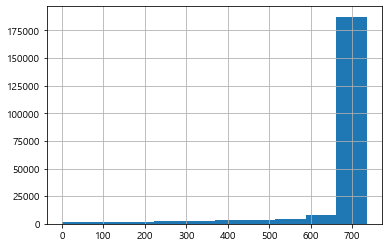

In [88]:
origin['dateCount'].hist()

In [89]:
# regdate 결측치 처리 (0000-00-00)
origin.loc[(origin.gameRegDate == '0000-00-00'), 'gameRegDate']= 0
origin.head(20)

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date,dateCount
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,4755,2011-12-22,라이엇게임즈,P,RTS,2019-01-17,735
1,737,배틀그라운드,2,0,19.64,61.31,1.23,1539932964,5037,305759,4692,2017-06-26,카카오/스팀,P,FPS,2019-01-17,735
2,750,피파온라인4,3,0,7.11,92.05,-0.40,557364347,2866,194528,4687,2017-12-14,넥슨,P,스포츠,2019-01-17,735
3,707,오버워치,4,0,7.04,21.96,-0.38,551336198,4299,128254,4650,2016-05-24,블리자드,P,FPS,2019-01-17,735
4,793,로스트아크,5,0,6.75,42.75,0.19,528826463,9041,58494,4501,2018-10-29,스마일게이트,P,RPG,2019-01-17,735
5,12,메이플스토리,6,1,4.04,25.56,0.10,316134817,6081,51992,4504,0,넥슨,P,RPG,2019-01-17,735
6,1,서든어택,7,-1,3.82,11.90,-0.15,298825999,3754,79606,4553,0,넥슨,P,FPS,2019-01-17,735
7,13,카트라이더,8,0,3.17,97.90,0.26,248358379,2423,102511,4587,0,넥슨,P,레이싱,2019-01-17,735
8,2,스타크래프트 리마스터,9,0,2.59,7.11,-0.02,202345385,4592,44069,4485,0,블리자드,P,RTS,2019-01-17,735
9,9,던전앤파이터,10,0,1.48,54.55,0.07,115662154,5553,20829,3900,0,넥슨,P,액션,2019-01-17,735


In [90]:
# 날짜형식으로 변환
origin['gameRegDate'] = pd.to_datetime(origin['gameRegDate'])

In [92]:
#날짜수가 735가 아닌 게임들만 출력
is_date = origin['dateCount'] != 735
date = df[is_date]
date = date.drop_duplicates(['gameCode'], keep='first').reset_index()
date

<ipython-input-92-0f646b16e279>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date = df[is_date]


,index,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date
0,25,815,Astellia,26,-2,0.21,1.31,-0.03,16097617,7946,2026,858,2018-12-10,스팀,P,RPG,2019-01-17
1,54,305,넷마블 포커리그,55,4,0.07,4.49,-0.01,5446603,2309,2359,844,2009-03-05,넷마블,F,보드,2019-01-17
2,60,733,니드 포 스피드 : 엣지,61,1,0.06,1.84,-0.01,4663226,2199,2121,1023,2017-02-10,넥슨,P,레이싱,2019-01-17
3,64,763,배틀라이트,65,3,0.06,1.88,0.01,3970163,3139,1265,564,2018-06-25,스팀,P,액션,2019-01-17
4,75,258,넷마블 대박맞고,76,1,0.04,2.34,0.00,2836304,2423,1171,587,0000-00-00,넷마블,F,보드,2019-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,196546,910,DRAGON BALL Z: KAKAROT,295,0,0.01,0.01,0.01,4053,2027,2,2,2020-02-11,스팀,P,RPG,2020-11-17
199,196551,958,Trine 4: The Nightmare Prince,300,-50,0.01,0.01,0.00,1686,843,2,1,2020-11-12,스팀,P,액션,2020-11-17
200,196840,957,INSIDE,287,0,0.01,0.01,0.01,12566,1143,11,4,2020-11-12,스팀,P,액션,2020-11-18
201,203326,970,엘리온,25,0,0.23,1.46,0.23,8409990,3844,2188,895,2020-12-10,카카오게임즈,P,RPG,2020-12-10


In [93]:
len(list(date.gameName))

203

In [60]:
origin[['gameName','dateCount']]

,gameName,dateCount
0,리그 오브 레전드,735
1,배틀그라운드,735
2,피파온라인4,735
3,오버워치,735
4,로스트아크,735
...,...,...
215958,Magic: The Gathering Arena,445
215959,0,0
215960,0,0
215961,0,0


총 371개 게임 중에서 전체 날짜가 있는 데이터는 168개

#### 날짜가 빈 게임 중 신규게임이 있나 확인

In [94]:
#날짜 빈 게임 중 신규게임 출력
f = (date.gameRegDate >= '2019-01-17')
list(date[f]['gameName'])

['Dead by Daylight',
 'Brawlhalla',
 'SMITE®',
 'APEX LEGENDS',
 '패스 오브 엑자일',
 'GOD EATER 3',
 'ANTHEM',
 'Human: Fall Flat',
 'Tom Clancy`s The Division 2',
 'The Sims 4',
 'Total War: THREE KINGDOMS',
 'Dota Underlords',
 'FIFA 20',
 'Borderlands 3',
 'Magic: The Gathering Arena',
 '레전드 오브 룬테라',
 "Tom Clancy's Ghost Recon Breakpoint",
 '콜 오브 듀티: 모던 워페어',
 'EVE Online',
 'Red Dead Redemption 2',
 'NBA 2K20',
 'Escape from Tarkov',
 'Football Manager 2020',
 'DJMAX RESPECT V',
 'Wolcen: Lords of Mayhem',
 "Conqueror's Blade",
 '뮤 이그니션(파이어폭스)',
 '섀도우 아레나',
 '발로란트',
 'SCP: Secret Laboratory',
 'Call of Duty®: WWII',
 "Hunter's Arena: Legends",
 'observer',
 'GTFO',
 'Fall Guys',
 'Hyper scape',
 'Trove',
 'astellia royal',
 'AMONG US',
 '콜 오브 듀티: 블랙 옵스 콜드 워',
 '이터널 리턴',
 'Phasmophobia',
 'Night of the Dead',
 'Witch It',
 'DRAGON BALL Z: KAKAROT',
 'Trine 4: The Nightmare Prince',
 'INSIDE',
 '엘리온',
 'Cyberpunk 2077']

In [95]:
print('did 기간동안 신규 출시 된 게임 수:',len(list(date[f]['gameName'])))

did 기간동안 신규 출시 된 게임 수: 49


In [96]:
#결측치가 5일 이내인 애들 출력(721~734)
is_date = (origin['dateCount'] > 730) & (origin['dateCount'] < 735)
date = df[is_date]
date = date.drop_duplicates(['gameCode'], keep='first').reset_index()
date

<ipython-input-96-0b90e30c3076>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date = df[is_date]


,index,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date
0,121,749,라그나로크 Zero,122,18,0.02,0.07,0.01,848558,3739,227,75,2017-12-06,그라비티,P,RPG,2019-01-17
1,146,783,DarkSouls III,147,-8,0.01,0.05,0.00,577094,5714,101,59,2018-07-18,스팀,P,RPG,2019-01-17
2,150,249,이터널시티,151,-19,0.01,0.05,0.00,546529,5941,92,57,0000-00-00,엠게임,P,RPG,2019-01-17
3,156,843,Warface,157,7,0.01,0.02,0.00,488851,7189,68,23,2018-12-28,스팀,P,FPS,2019-01-17
4,161,796,Assassin`s Creed Odyssey,162,-24,0.01,0.21,0.00,435697,6225,70,36,2018-12-07,스팀,P,액션,2019-01-17
5,166,76,실크로드,167,5,0.01,0.04,0.00,396082,10156,39,20,0000-00-00,조이맥스,F,RPG,2019-01-17
6,168,813,The Witcher 3: Wild Hunt,169,2,0.01,0.17,0.00,357631,12333,29,22,2018-12-07,스팀,P,액션,2019-01-17
7,174,824,Company of Heroes 2,175,-15,0.01,0.02,0.00,331587,5264,63,32,2018-12-28,스팀,P,RTS,2019-01-17
8,178,830,Europa Universalis IV,179,1,0.01,0.02,0.00,288855,3321,87,26,2018-12-28,스팀,P,RTS,2019-01-17
9,179,775,Unturned,180,4,0.01,0.01,0.00,276802,4259,65,33,2018-07-18,스팀,P,RTS,2019-01-17


In [ ]:
#원하는 value만 필터링 하기 
df[df.date.isin([a,g,d])]

In [98]:
#메이플스토리
origin.loc[origin['gameName']=='라그나로크 Zero']

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date,dateCount
121,749,라그나로크 Zero,122,18,0.02,0.07,0.01,848558,3739,227,75,2017-12-06,그라비티,P,RPG,2019-01-17,734
418,749,라그나로크 Zero,128,-6,0.01,0.07,-0.01,851912,3981,214,63,2017-12-06,그라비티,P,RPG,2019-01-18,734
698,749,라그나로크 Zero,119,9,0.02,0.07,0.01,1183220,4752,249,86,2017-12-06,그라비티,P,RPG,2019-01-19,734
992,749,라그나로크 Zero,119,0,0.02,0.07,0.00,1225542,5836,210,82,2017-12-06,그라비티,P,RPG,2019-01-20,734
1284,749,라그나로크 Zero,120,-1,0.02,0.08,0.00,926774,5721,162,64,2017-12-06,그라비티,P,RPG,2019-01-21,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214658,749,라그나로크 Zero,185,3,0.01,0.03,0.00,175616,5166,34,7,2017-12-06,그라비티,P,RPG,2021-01-16,734
214971,749,라그나로크 Zero,196,-13,0.01,0.02,0.00,133473,6674,20,6,2017-12-06,그라비티,P,RPG,2021-01-17,734
215287,749,라그나로크 Zero,212,-16,0.01,0.02,0.00,71886,7988,9,3,2017-12-06,그라비티,P,RPG,2021-01-18,734
215581,749,라그나로크 Zero,214,-2,0.01,0.02,0.00,68681,8586,8,5,2017-12-06,그라비티,P,RPG,2021-01-19,734


In [73]:
origin

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date,dateCount
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,4755,2011-12-22,라이엇게임즈,P,RTS,2019-01-17,735
1,737,배틀그라운드,2,0,19.64,61.31,1.23,1539932964,5037,305759,4692,2017-06-26,카카오/스팀,P,FPS,2019-01-17,735
2,750,피파온라인4,3,0,7.11,92.05,-0.40,557364347,2866,194528,4687,2017-12-14,넥슨,P,스포츠,2019-01-17,735
3,707,오버워치,4,0,7.04,21.96,-0.38,551336198,4299,128254,4650,2016-05-24,블리자드,P,FPS,2019-01-17,735
4,793,로스트아크,5,0,6.75,42.75,0.19,528826463,9041,58494,4501,2018-10-29,스마일게이트,P,RPG,2019-01-17,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215958,880,Magic: The Gathering Arena,293,-35,0.01,0.01,0.00,3489,1745,2,2,2019-10-15,위저드 오브 더 코스트,P,보드,2021-01-20,445
215959,0,0,0,0,0.00,0.00,0.00,0,0,0,0,1970-01-01,0,0,0,0,0
215960,0,0,0,0,0.00,0.00,0.00,0,0,0,0,1970-01-01,0,0,0,0,0
215961,0,0,0,0,0.00,0.00,0.00,0,0,0,0,1970-01-01,0,0,0,0,0


In [102]:
idx = origin[origin['dateCount']!=735].index
df1 = origin.drop(idx)

In [106]:
df1.head(30)

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date,dateCount
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,4755,2011-12-22,라이엇게임즈,P,RTS,2019-01-17,735
1,737,배틀그라운드,2,0,19.64,61.31,1.23,1539932964,5037,305759,4692,2017-06-26,카카오/스팀,P,FPS,2019-01-17,735
2,750,피파온라인4,3,0,7.11,92.05,-0.40,557364347,2866,194528,4687,2017-12-14,넥슨,P,스포츠,2019-01-17,735
3,707,오버워치,4,0,7.04,21.96,-0.38,551336198,4299,128254,4650,2016-05-24,블리자드,P,FPS,2019-01-17,735
4,793,로스트아크,5,0,6.75,42.75,0.19,528826463,9041,58494,4501,2018-10-29,스마일게이트,P,RPG,2019-01-17,735
5,12,메이플스토리,6,1,4.04,25.56,0.10,316134817,6081,51992,4504,1970-01-01,넥슨,P,RPG,2019-01-17,735
6,1,서든어택,7,-1,3.82,11.90,-0.15,298825999,3754,79606,4553,1970-01-01,넥슨,P,FPS,2019-01-17,735
7,13,카트라이더,8,0,3.17,97.90,0.26,248358379,2423,102511,4587,1970-01-01,넥슨,P,레이싱,2019-01-17,735
8,2,스타크래프트 리마스터,9,0,2.59,7.11,-0.02,202345385,4592,44069,4485,1970-01-01,블리자드,P,RTS,2019-01-17,735
9,9,던전앤파이터,10,0,1.48,54.55,0.07,115662154,5553,20829,3900,1970-01-01,넥슨,P,액션,2019-01-17,735


In [108]:
df1.to_csv('master_did_210917.csv')

In [109]:
idx = origin[origin['gameRegDate']< '2019-01-17'].index
df2 = origin.drop(idx)
df2

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date,dateCount
2957,850,Dead by Daylight,34,0,0.14,3.45,-0.01,15606719,3426,4556,1206,2019-01-21,스팀,P,액션,2019-01-27,725
3173,848,Brawlhalla,250,17,0.01,0.02,0.00,67652,2819,24,11,2019-01-21,스팀,F,액션,2019-01-27,717
3211,849,SMITE®,288,3,0.01,0.01,0.00,6279,1570,4,2,2019-01-21,스팀,F,액션,2019-01-27,566
3255,850,Dead by Daylight,35,-1,0.14,4.36,0.00,11079926,3330,3328,1002,2019-01-21,스팀,P,액션,2019-01-28,725
3475,848,Brawlhalla,255,-5,0.01,0.02,0.00,45838,2547,18,10,2019-01-21,스팀,F,액션,2019-01-28,717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215945,881,Tom Clancy's Ghost Recon Breakpoint,280,5,0.01,0.01,0.00,11314,3772,3,2,2019-10-17,유비소프트(주),P,FPS,2021-01-20,407
215949,910,DRAGON BALL Z: KAKAROT,284,0,0.01,0.01,0.01,8150,8150,1,1,2020-02-11,스팀,P,RPG,2021-01-20,41
215950,925,Call of Duty®: WWII,285,-1,0.01,0.01,0.00,7892,7892,1,1,2020-04-14,스팀,P,FPS,2021-01-20,138
215954,958,Trine 4: The Nightmare Prince,289,-35,0.01,0.01,0.00,5792,724,8,2,2020-11-12,스팀,P,액션,2021-01-20,48


In [110]:
df2.to_csv('master_did_210917_2.csv')

In [101]:
# 날짜형식으로 변환
origin['date'] = pd.to_datetime(origin['date'])
origin['date'].head()

0   2019-01-17
1   2019-01-17
2   2019-01-17
3   2019-01-17
4   2019-01-17
Name: date, dtype: datetime64[ns]

In [ ]:
#없는 날짜에 모두 na 값 넣어보려다가 포기...
https://yobbicorgi.tistory.com/3
while True:
    time_list=[]
    for p in range(len(origin)-1):
        if (origin['date'][p+1]-origin['date'][p]).days>1:
            for t in range(int((origin['date'][p+1]-origin['date'][p]).days):
                           timelist_list.appen(df['date'][p])
            